In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import models

import os
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
train_images = train_images.reshape((60000, 28, 28, 1))
#train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
#test_images = test_images.astype('float32') / 255

In [4]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [5]:
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

h= model.fit(x=train_images, y=train_labels, epochs=15,validation_split=0.2, batch_size=64)

Epoch 1/15
750/750 [==============================] - 5s 4ms/step - loss: 0.4516 - accuracy: 0.9019 - val_loss: 0.1182 - val_accuracy: 0.9635
Epoch 2/15
750/750 [==============================] - 2s 3ms/step - loss: 0.0976 - accuracy: 0.9707 - val_loss: 0.0822 - val_accuracy: 0.9760
Epoch 3/15
750/750 [==============================] - 2s 3ms/step - loss: 0.0691 - accuracy: 0.9787 - val_loss: 0.0632 - val_accuracy: 0.9823
Epoch 4/15
750/750 [==============================] - 2s 3ms/step - loss: 0.0547 - accuracy: 0.9828 - val_loss: 0.0676 - val_accuracy: 0.9814
Epoch 5/15
750/750 [==============================] - 2s 3ms/step - loss: 0.0495 - accuracy: 0.9846 - val_loss: 0.0847 - val_accuracy: 0.9783
Epoch 6/15
750/750 [==============================] - 2s 3ms/step - loss: 0.0468 - accuracy: 0.9850 - val_loss: 0.0753 - val_accuracy: 0.9830
Epoch 7/15
750/750 [==============================] - 2s 3ms/step - loss: 0.0409 - accuracy: 0.9874 - val_loss: 0.0692 - val_accuracy: 0.9837
Epoch 

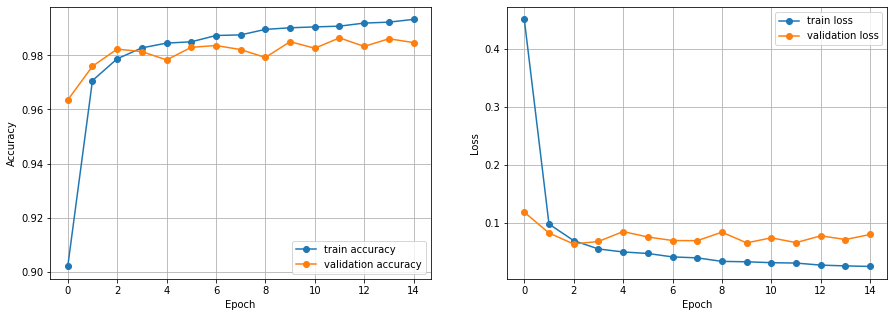

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc
test_loss

313/313 [==============================] - 1s 2ms/step - loss: 0.0600 - accuracy: 0.9861


0.06001992151141167

**With Normalization:**
adam accuracy: 98.97%
sgd accuracy: 98.02%
rmsprop: 99.11%

**Without Normalization:**
adam accuracy: 98.61%
sgd accuracy: 97.97%
rmsprop: 98.59%